In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for win
mpl.rc('font',family='MS Gothic')


In [3]:
#データのインポート

saimesh1 = gpd.read_file('data/SDDSWS5338.zip')
saimesh2 = gpd.read_file('data/SDDSWS5339.zip')
saimesh3 = gpd.read_file('data/SDDSWS5438.zip')
saimesh4 = gpd.read_file('data/SDDSWS5439.zip')


In [4]:
# 統合
saimesh = gpd.pd.concat([saimesh1,saimesh2,saimesh3,saimesh4])

<Axes: >

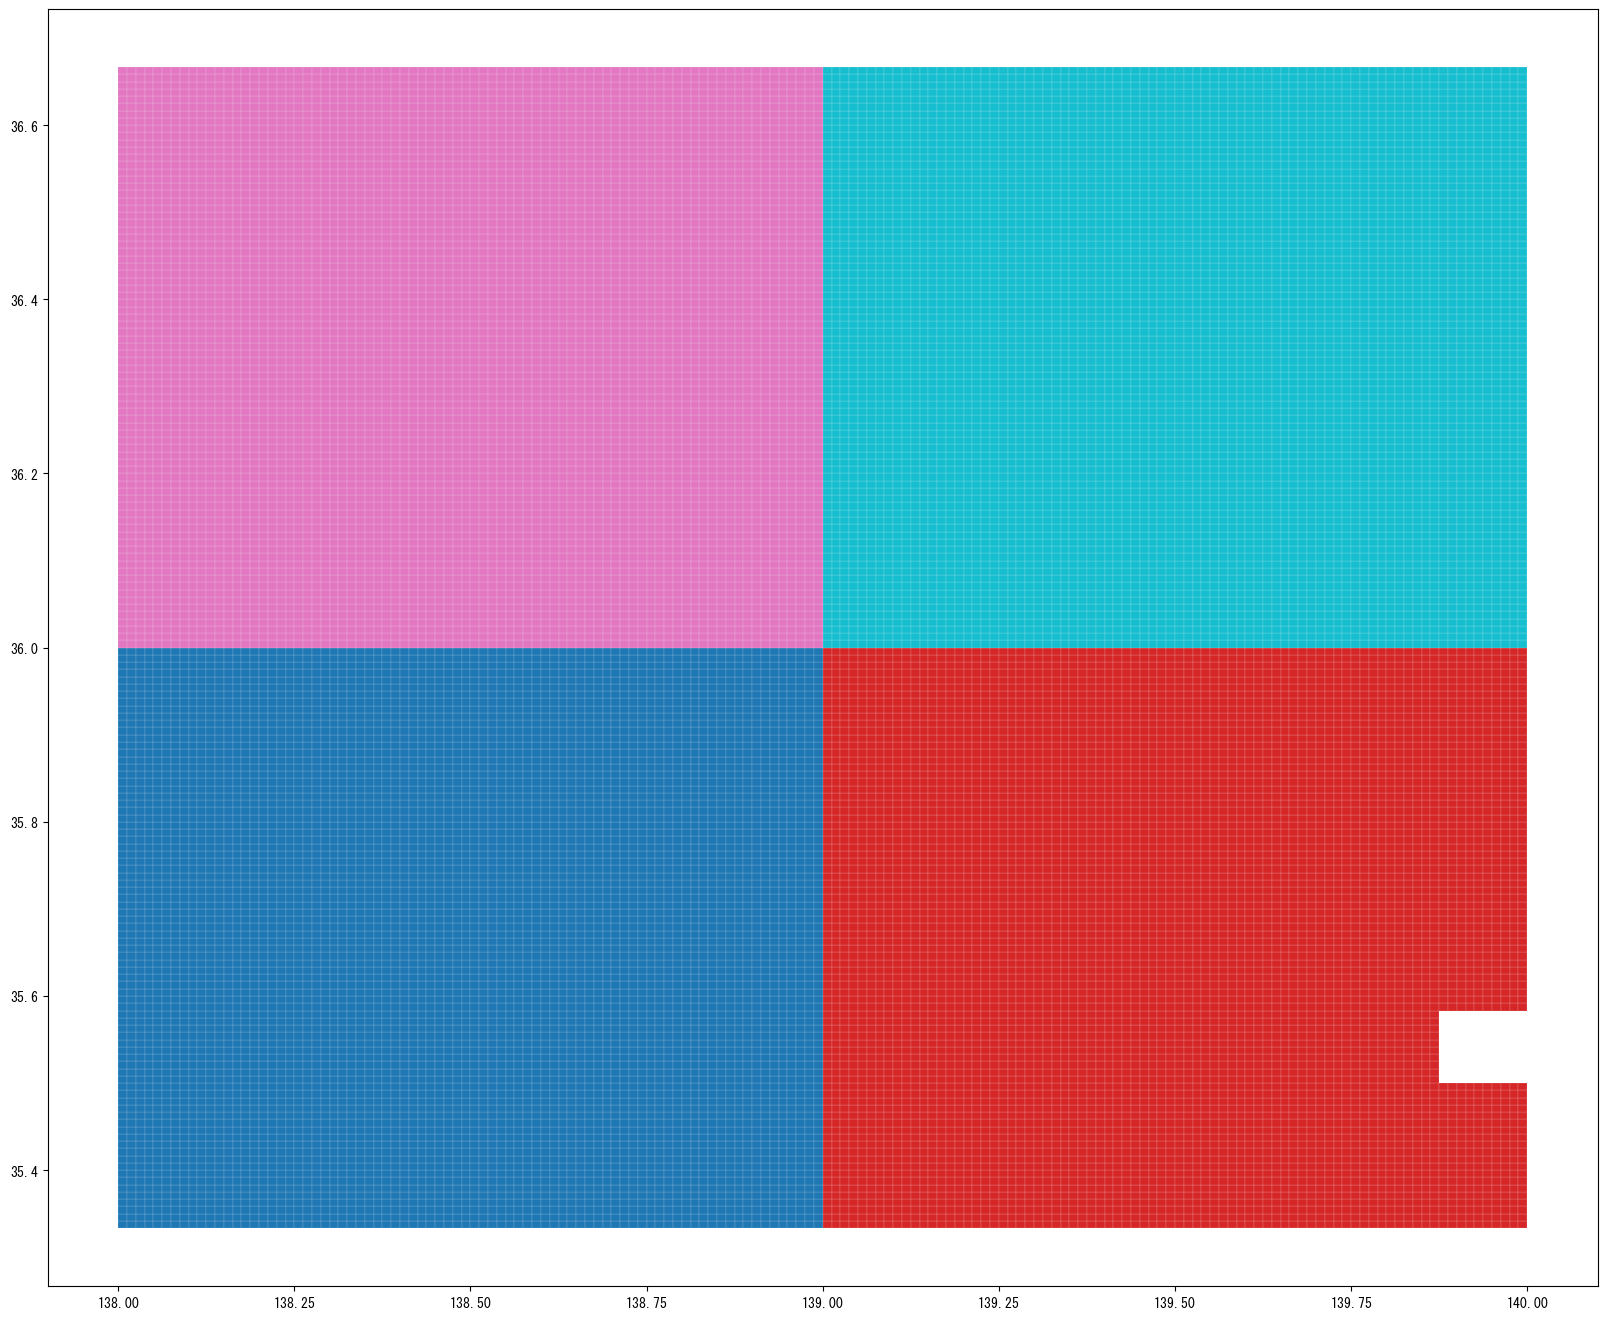

In [5]:
# とりまテスト
saimesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [10]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
saidata1 = pd.read_csv('data/tblT001100S5338.zip', encoding='cp932')
saidata2 = pd.read_csv('data/tblT001100S5339.zip', encoding='cp932')
saidata3 = pd.read_csv('data/tblT001100S5438.zip', encoding='cp932')
saidata4 = pd.read_csv('data/tblT001100S5439.zip', encoding='cp932')
saidata5 = pd.read_csv('data/tblT000846S5338.zip', encoding='cp932')
saidata6 = pd.read_csv('data/tblT000846S5339.zip', encoding='cp932')
saidata7 = pd.read_csv('data/tblT000846S5438.zip', encoding='cp932')
saidata8 = pd.read_csv('data/tblT000846S5439.zip', encoding='cp932')

In [11]:
saidata5.head()

KEY_CODE  HTKSYORI     HTKSAKI             GASSAN T000846001 T000846002   
0         NaN       NaN         NaN                NaN      　人口総数    　人口総数　男  \
1  53380060.0       1.0         NaN  53380061;53380062         12          5   
2  53380061.0       2.0  53380060.0                NaN          1          1   
3  53380062.0       2.0  53380060.0                NaN          1          1   
4  53380213.0       2.0  53380275.0                NaN          1          0   

  T000846003  T000846004  T000846005  T000846006  ...   T000846032   
0    　人口総数　女  　０～１４歳人口総数  　０～１４歳人口　男  　０～１４歳人口　女  ...  　６人世帯の一般世帯数  \
1          7           1           1           0  ...            0   
2          0           *           *           *  ...            *   
3          0           *           *           *  ...            *   
4          1           *           *           *  ...            *   

      T000846033   T000846034  T000846035    T000846036        T000846037   
0  　７人以上世帯の一般世帯数  　親族のみの一般世帯数  　核家族の一般世帯数  　核家族以外の一般世帯数  　６歳未満世帯員のいる一般世帯数  \
1              0            4           4             0                 0   
2              *            *           *             *                 *   
3              *            *           *             *                 *   
4              *            *           *             *                 *   

          T000846038                 T000846039   T000846040     T000846041  
0  　６５歳以上世帯員のいる一般世帯数  　世帯主の年齢が２０～２９歳の１人世帯の一般世帯数  　高齢単身の一般世帯数  　高齢夫婦のみの一般世帯数  
1                  7                          0            4              3  
2                  *                          *            *              *  
3                  *                          *            *              *  
4                  *                          *            *              *  

[5 rows x 45 columns]

いらないものを削除

In [12]:
saidata1 = saidata1[1:]
saidata2 = saidata2[1:]
saidata3 = saidata3[1:]
saidata4 = saidata4[1:]
saidata5 = saidata5[1:]
saidata6 = saidata6[1:]
saidata7 = saidata7[1:]
saidata8 = saidata8[1:]

saidata1 = saidata1.replace('*',np.nan)
saidata2 = saidata2.replace('*',np.nan)
saidata3 = saidata3.replace('*',np.nan)
saidata4 = saidata4.replace('*',np.nan)
saidata5 = saidata5.replace('*',np.nan)
saidata6 = saidata6.replace('*',np.nan)
saidata7 = saidata7.replace('*',np.nan)
saidata8 = saidata8.replace('*',np.nan)

削除の確認

In [13]:
saidata5.head(5)

KEY_CODE  HTKSYORI     HTKSAKI             GASSAN T000846001 T000846002   
1  53380060.0       1.0         NaN  53380061;53380062         12          5  \
2  53380061.0       2.0  53380060.0                NaN          1          1   
3  53380062.0       2.0  53380060.0                NaN          1          1   
4  53380213.0       2.0  53380275.0                NaN          1          0   
5  53380234.0       2.0  53380275.0                NaN          4          2   

  T000846003 T000846004 T000846005 T000846006  ... T000846032 T000846033   
1          7          1          1          0  ...          0          0  \
2          0        NaN        NaN        NaN  ...        NaN        NaN   
3          0        NaN        NaN        NaN  ...        NaN        NaN   
4          1        NaN        NaN        NaN  ...        NaN        NaN   
5          2        NaN        NaN        NaN  ...        NaN        NaN   

  T000846034 T000846035 T000846036 T000846037 T000846038 T000846039   
1          4          4          0          0          7          0  \
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   

  T000846040 T000846041  
1          4          3  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  

[5 rows x 45 columns]

ここまで前回と一緒

ここから今回の内容

In [16]:
saidata2020 = pd.concat([saidata1,saidata2,saidata3,saidata4])
saidata2015 = pd.concat([saidata5,saidata6,saidata7,saidata8])
saidata2015.head()

KEY_CODE  HTKSYORI     HTKSAKI             GASSAN T000846001 T000846002   
1  53380060.0       1.0         NaN  53380061;53380062         12          5  \
2  53380061.0       2.0  53380060.0                NaN          1          1   
3  53380062.0       2.0  53380060.0                NaN          1          1   
4  53380213.0       2.0  53380275.0                NaN          1          0   
5  53380234.0       2.0  53380275.0                NaN          4          2   

  T000846003 T000846004 T000846005 T000846006  ... T000846032 T000846033   
1          7          1          1          0  ...          0          0  \
2          0        NaN        NaN        NaN  ...        NaN        NaN   
3          0        NaN        NaN        NaN  ...        NaN        NaN   
4          1        NaN        NaN        NaN  ...        NaN        NaN   
5          2        NaN        NaN        NaN  ...        NaN        NaN   

  T000846034 T000846035 T000846036 T000846037 T000846038 T000846039   
1          4          4          0          0          7          0  \
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   

  T000846040 T000846041  
1          4          3  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  

[5 rows x 45 columns]

In [17]:
saidata2020.head()

KEY_CODE  HTKSYORI     HTKSAKI             GASSAN T001100001 T001100002   
1  53380060.0       1.0         NaN  53381022;53381030          8          4  \
2  53380234.0       2.0  53380275.0                NaN          2          1   
3  53380244.0       2.0  53380275.0                NaN          1          0   
4  53380258.0       2.0  53380275.0                NaN          1          1   
5  53380265.0       2.0  53380275.0                NaN          2          0   

  T001100003 T001100004 T001100005 T001100006  ... T001100041 T001100042   
1          4          0          0          0  ...          0          0  \
2          1        NaN        NaN        NaN  ...        NaN        NaN   
3          1        NaN        NaN        NaN  ...        NaN        NaN   
4          0        NaN        NaN        NaN  ...        NaN        NaN   
5          2        NaN        NaN        NaN  ...        NaN        NaN   

  T001100043 T001100044 T001100045 T001100046 T001100047 T001100048   
1          5          5          0          0          7          0  \
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   

  T001100049 T001100050  
1          3          4  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  

[5 rows x 54 columns]

HTKSYORI,HTKSAKI,GASSANを削除

In [19]:
columns = ['HTKSYORI', 'HTKSAKI', 'GASSAN']
saidata2015 = saidata2015.drop(columns=columns)
saidata2020 = saidata2020.drop(columns=columns)

KeyError: "['HTKSYORI', 'HTKSAKI', 'GASSAN'] not found in axis"

↑誤って2回実行してエラーになっているだけです。

In [20]:
saidata2020.head()

KEY_CODE T001100001 T001100002 T001100003 T001100004 T001100005   
1  53380060.0          8          4          4          0          0  \
2  53380234.0          2          1          1        NaN        NaN   
3  53380244.0          1          0          1        NaN        NaN   
4  53380258.0          1          1          0        NaN        NaN   
5  53380265.0          2          0          2        NaN        NaN   

  T001100006 T001100007 T001100008 T001100009  ... T001100041 T001100042   
1          0         13          6          7  ...          0          0  \
2        NaN        NaN        NaN        NaN  ...        NaN        NaN   
3        NaN        NaN        NaN        NaN  ...        NaN        NaN   
4        NaN        NaN        NaN        NaN  ...        NaN        NaN   
5        NaN        NaN        NaN        NaN  ...        NaN        NaN   

  T001100043 T001100044 T001100045 T001100046 T001100047 T001100048   
1          5          5          0          0          7          0  \
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   

  T001100049 T001100050  
1          3          4  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  

[5 rows x 51 columns]

In [21]:
saidata2015.head()

KEY_CODE T000846001 T000846002 T000846003 T000846004 T000846005   
1  53380060.0         12          5          7          1          1  \
2  53380061.0          1          1          0        NaN        NaN   
3  53380062.0          1          1          0        NaN        NaN   
4  53380213.0          1          0          1        NaN        NaN   
5  53380234.0          4          2          2        NaN        NaN   

  T000846006 T000846007 T000846008 T000846009  ... T000846032 T000846033   
1          0         13          6          7  ...          0          0  \
2        NaN        NaN        NaN        NaN  ...        NaN        NaN   
3        NaN        NaN        NaN        NaN  ...        NaN        NaN   
4        NaN        NaN        NaN        NaN  ...        NaN        NaN   
5        NaN        NaN        NaN        NaN  ...        NaN        NaN   

  T000846034 T000846035 T000846036 T000846037 T000846038 T000846039   
1          4          4          0          0          7          0  \
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   

  T000846040 T000846041  
1          4          3  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  

[5 rows x 42 columns]

In [22]:
# combine 2015 and 2020 data
saidata = pd.merge(saidata2020,saidata2015,on='KEY_CODE')

In [24]:
# check data info
saidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15213 entries, 0 to 15212
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    15213 non-null  float64
 1   T001100001  15213 non-null  object 
 2   T001100002  15213 non-null  object 
 3   T001100003  15213 non-null  object 
 4   T001100004  14144 non-null  object 
 5   T001100005  14144 non-null  object 
 6   T001100006  14144 non-null  object 
 7   T001100007  14144 non-null  object 
 8   T001100008  14144 non-null  object 
 9   T001100009  14144 non-null  object 
 10  T001100010  14144 non-null  object 
 11  T001100011  14144 non-null  object 
 12  T001100012  14144 non-null  object 
 13  T001100013  14144 non-null  object 
 14  T001100014  14144 non-null  object 
 15  T001100015  14144 non-null  object 
 16  T001100016  14144 non-null  object 
 17  T001100017  14144 non-null  object 
 18  T001100018  14144 non-null  object 
 19  T001100019  14144 non-nul

In [25]:
# 1番目以降をアウトプット
saidata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [26]:
# 元のデータを入れ替える
saidata[saidata.columns[1:]]=saidata[saidata.columns[1:]].astype(float)

In [28]:
# check!
saidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15213 entries, 0 to 15212
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    15213 non-null  float64
 1   T001100001  15213 non-null  float64
 2   T001100002  15213 non-null  float64
 3   T001100003  15213 non-null  float64
 4   T001100004  14144 non-null  float64
 5   T001100005  14144 non-null  float64
 6   T001100006  14144 non-null  float64
 7   T001100007  14144 non-null  float64
 8   T001100008  14144 non-null  float64
 9   T001100009  14144 non-null  float64
 10  T001100010  14144 non-null  float64
 11  T001100011  14144 non-null  float64
 12  T001100012  14144 non-null  float64
 13  T001100013  14144 non-null  float64
 14  T001100014  14144 non-null  float64
 15  T001100015  14144 non-null  float64
 16  T001100016  14144 non-null  float64
 17  T001100017  14144 non-null  float64
 18  T001100018  14144 non-null  float64
 19  T001100019  14144 non-nul

In [29]:
# KEY_CODEをfloatに
saimesh['KEY_CODE']=saimesh['KEY_CODE'].astype(float)

In [30]:
# merge the data
saimesh = saimesh.merge(saidata, on='KEY_CODE')

In [31]:
# check!
saimesh.sample(5)

KEY_CODE MESH1_ID MESH2_ID MESH3_ID  OBJ_ID   
6208   53397322.0     5339       73       22    5823  \
12184  54393034.0     5439       30       34    2435   
8244   54384148.0     5438       41       48    3349   
11983  54392631.0     5439       26       31    2232   
6916   54380684.0     5438       06       84     685   

                                                geometry  T001100001   
6208   POLYGON ((139.41250 35.93333, 139.40000 35.933...      2996.0  \
12184  POLYGON ((139.06250 36.27500, 139.05000 36.275...       159.0   
8244   POLYGON ((138.23750 36.36667, 138.22500 36.366...        99.0   
11983  POLYGON ((139.77500 36.19167, 139.76250 36.191...       559.0   
6916   POLYGON ((138.81250 36.06667, 138.80000 36.066...        55.0   

       T001100002  T001100003  T001100004  ...  T000846032  T000846033   
6208       1468.0      1528.0       388.0  ...        25.0         7.0  \
12184        80.0        79.0        10.0  ...         2.0         0.0   
8244         47.0        52.0         3.0  ...         0.0         0.0   
11983       285.0       274.0        56.0  ...         4.0         5.0   
6916         30.0        25.0         3.0  ...         0.0         0.0   

       T000846034  T000846035  T000846036  T000846037  T000846038  T000846039   
6208        934.0       830.0       104.0        96.0       597.0         5.0  \
12184        47.0        33.0        14.0         5.0        36.0         0.0   
8244         10.0         9.0         1.0         1.0         8.0        25.0   
11983       157.0       118.0        39.0        17.0        99.0         1.0   
6916         21.0        17.0         4.0         1.0        19.0         0.0   

       T000846040  T000846041  
6208         83.0       250.0  
12184         7.0         9.0  
8244          3.0         3.0  
11983        12.0        18.0  
6916          2.0         9.0  

[5 rows x 97 columns]

In [32]:
# reproject to 3857 (web mercator)
saimesh = saimesh.to_crs(3857)

2020年

<Axes: >

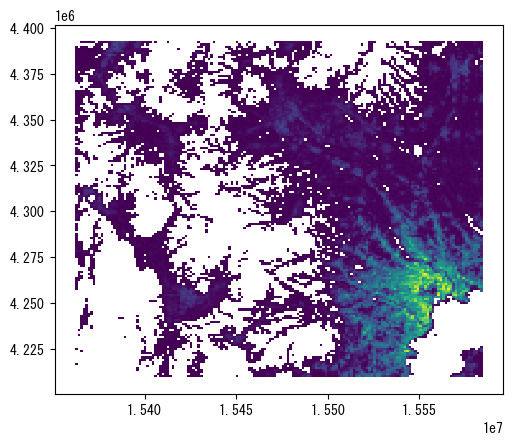

In [33]:
# make a quick plot
saimesh.plot(column='T001100001')

2015年

<Axes: >

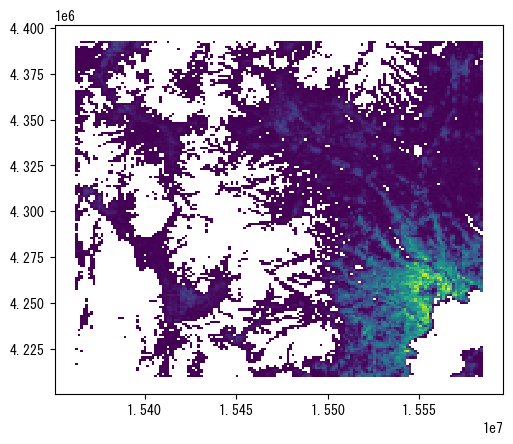

In [34]:
# make a quick plot
saimesh.plot(column='T000846001')

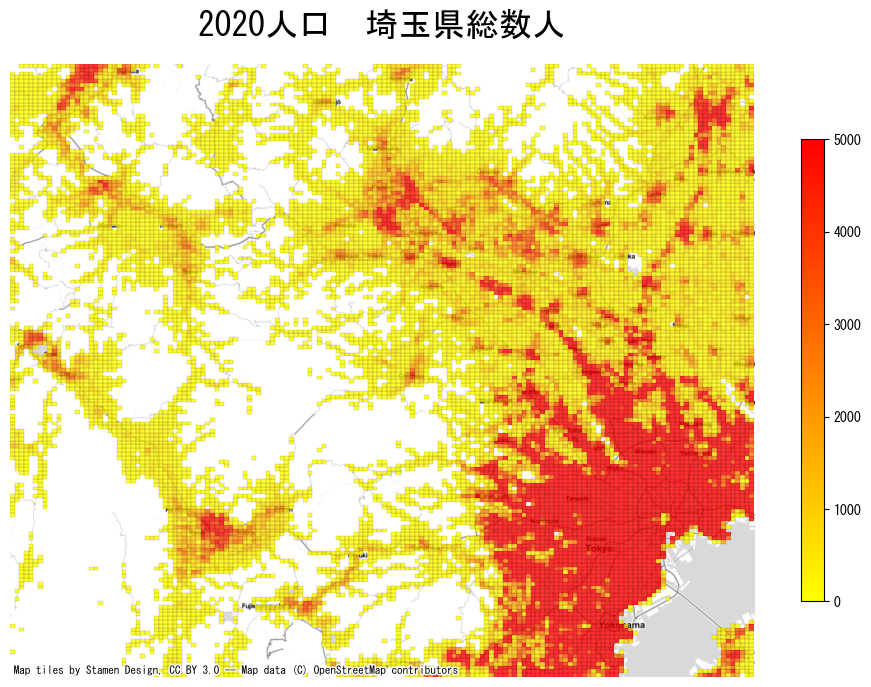

In [36]:
# 2020 population map
ax = saimesh.plot(figsize=(12,12),
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'shrink':0.5},
         vmin = 0,
         vmax = 5000
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020人口　埼玉県総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# zoom to bounds
ax.set_xlim(saimesh.total_bounds[0],saimesh.total_bounds[2])
ax.set_ylim(saimesh.total_bounds[1],saimesh.total_bounds[3])

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

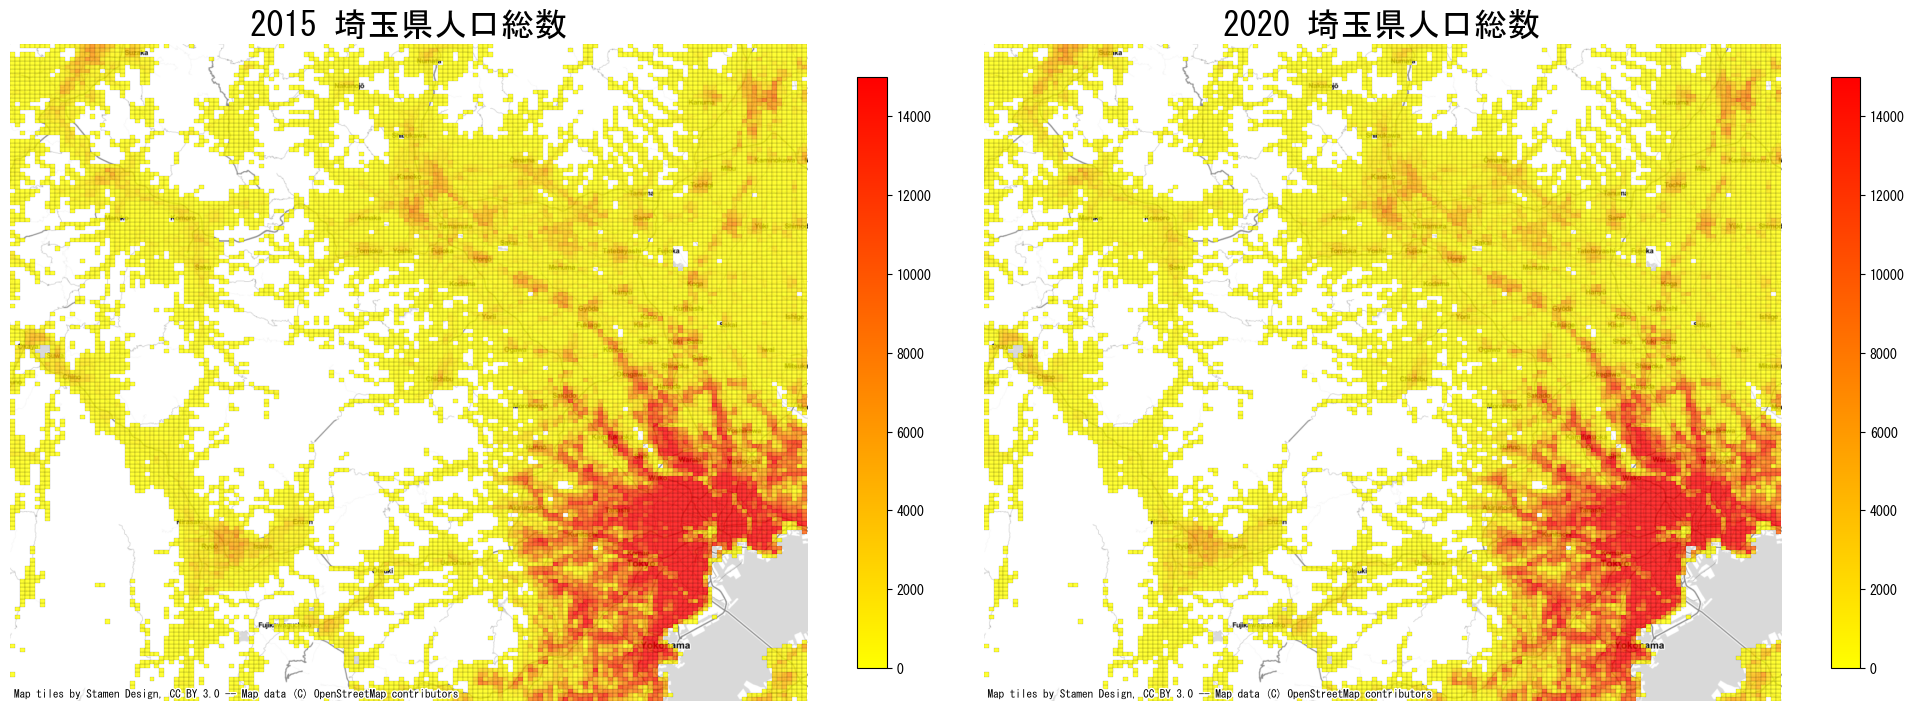

In [37]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
saimesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
saimesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 埼玉県人口総数',fontsize=24); # 左
ax[1].set_title('2020 埼玉県人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = saimesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

2020年と2015年の差の計算

In [38]:
# create a new field
saimesh['pop_change_2015_2020'] = np.nan

In [39]:
# calculate population change
saimesh['pop_change_2015_2020'] = saimesh['T000846001'] - saimesh['T001100001']

In [40]:
# check!
saimesh[['KEY_CODE','T001100001','T000846001','pop_change_2015_2020']].sample(5)

KEY_CODE  T001100001  T000846001  pop_change_2015_2020
7654   54383147.0         5.0         5.0                   0.0
6670   53397796.0       228.0       248.0                  20.0
10977  54391391.0      4211.0      4368.0                 157.0
5506   53396326.0       482.0       453.0                 -29.0
8766   54385187.0         1.0         1.0                   0.0

2020年と2015年の差のマップ

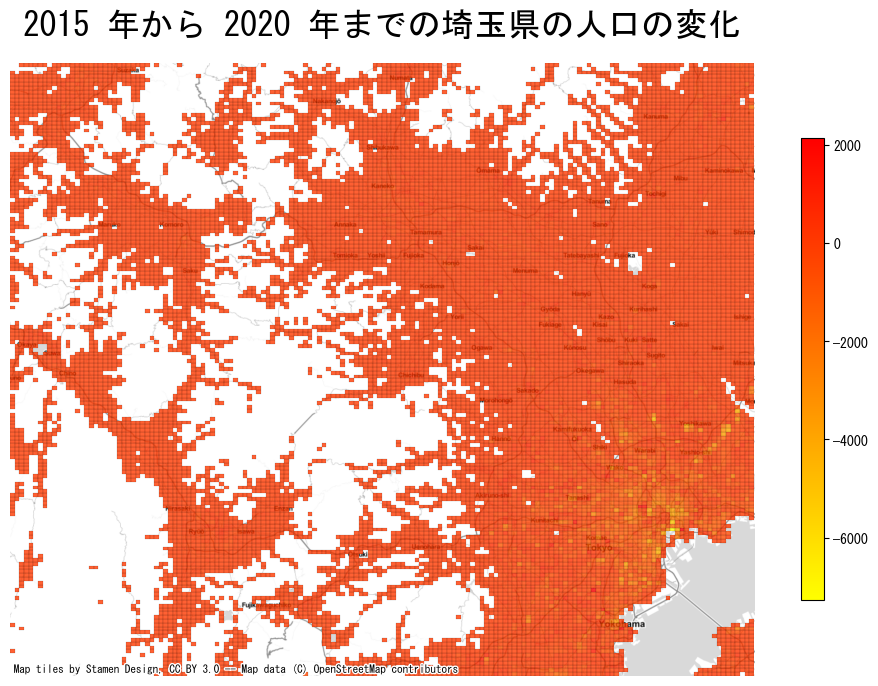

In [42]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) # 一つのマップなのでnrows,ncols=1

# 2015-2020 population change
saimesh.plot(ax = ax,
        column='pop_change_2015_2020',
        legend=True,
        legend_kwds={'shrink': 0.5},
        cmap='autumn_r',
        edgecolor='black',
        linewidth=0.1,
        alpha=0.8,)

# hide axes
ax.axis('off')

# title
ax.set_title('2015 年から 2020 年までの埼玉県の人口の変化',fontsize=24, pad=20);

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = saimesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

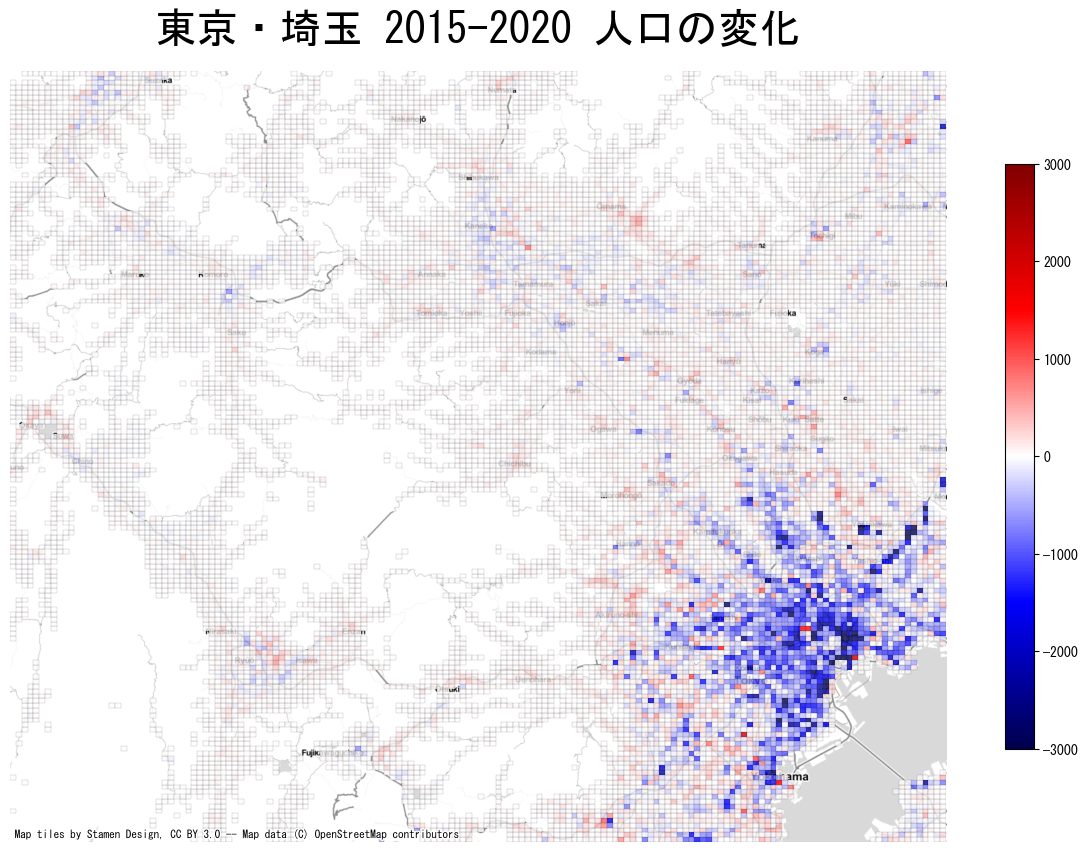

In [44]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
saimesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-3000, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=3000
         )

# hide axes
ax.axis('off')

# title
ax.set_title('東京・埼玉 2015-2020 人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = saimesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


人口増加20位

人口減少20位

In [45]:
# sort by population change
saimesh = saimesh.sort_values(by='pop_change_2015_2020')

In [46]:
# check!
saimesh['pop_change_2015_2020']

3929   -7281.0
4468   -5095.0
5753   -4785.0
3930   -4396.0
3834   -4385.0
         ...  
4412    1436.0
2847    1564.0
4411    1620.0
3193    2110.0
3931    2131.0
Name: pop_change_2015_2020, Length: 15213, dtype: float64

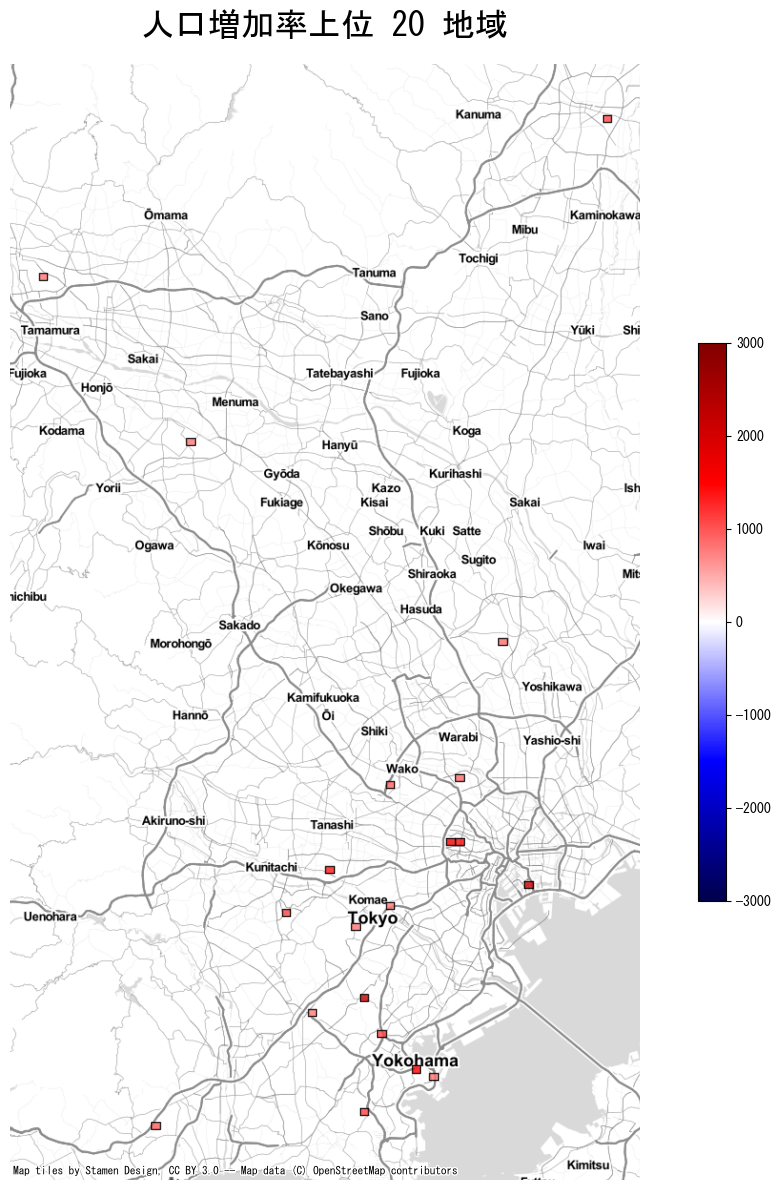

In [47]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
saimesh.tail(20).plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=1,
         alpha=0.8,
         vmin=-3000,
         vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('人口増加率上位 20 地域',fontsize=24, pad=20)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


埼玉県は千葉県のすぐ右にあるため、結果があまり変わらない。

南の部分が無くなった分、北の部分が異なる。

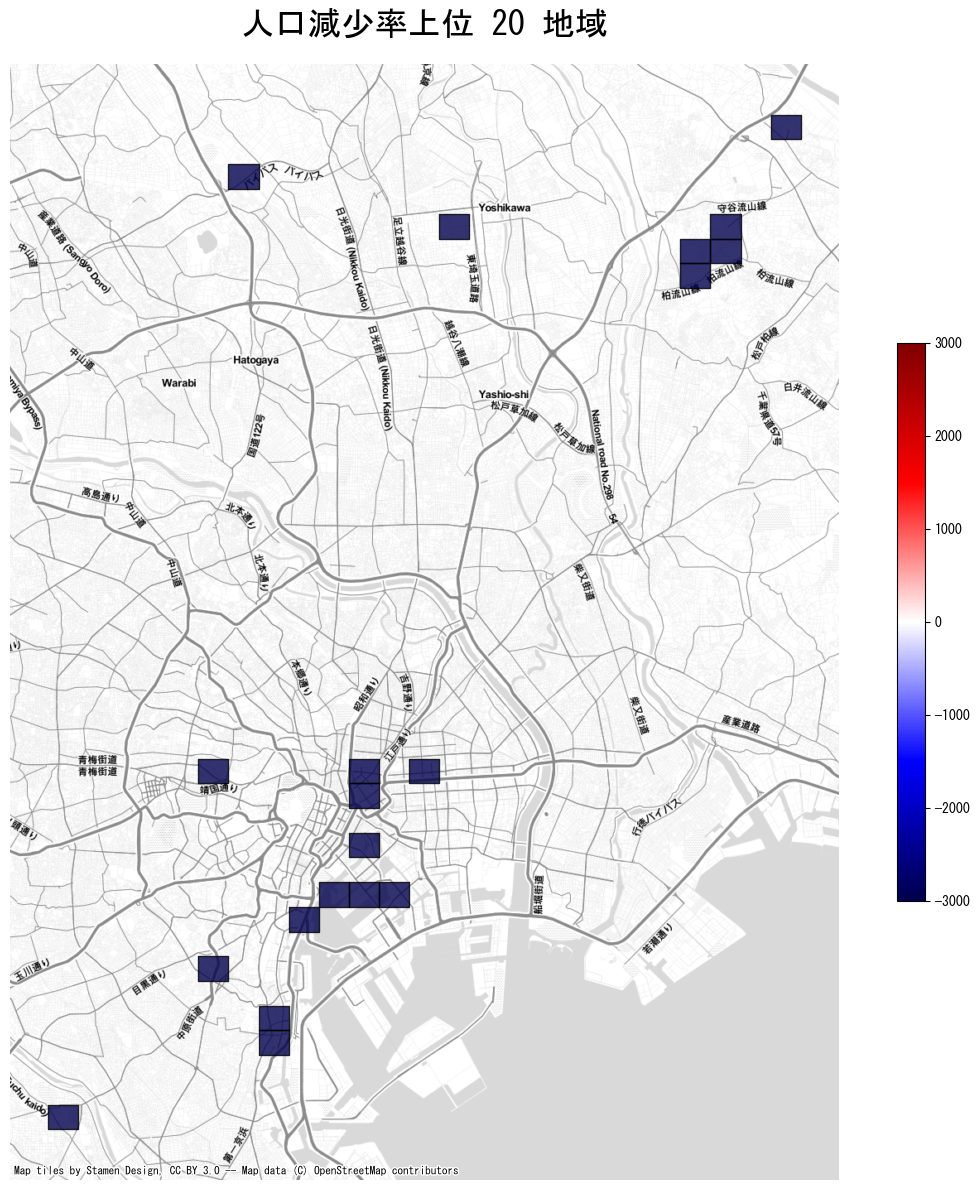

In [48]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
saimesh.head(20).plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=1,
         alpha=0.8,
         vmin=-3000,
         vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('人口減少率上位 20 地域',fontsize=24, pad=20)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


減少率に関してはすべて一緒

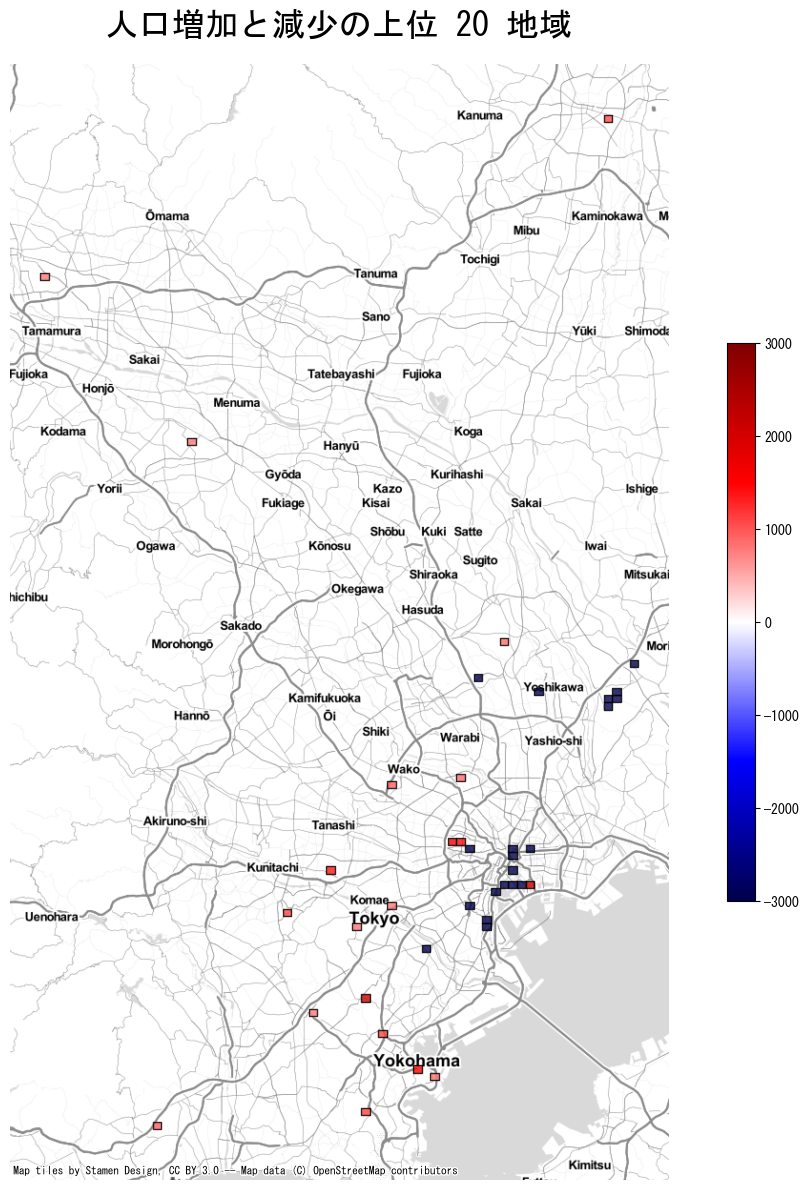

In [49]:
# population map
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))

# 2015-2020 population change
saimesh.head(20).plot(ax = ax,
        column='pop_change_2015_2020',
        legend=True,legend_kwds={'shrink': 0.5},
        cmap='seismic',
        edgecolor='black',
        linewidth=1,
        alpha=0.8,
        vmin=-3000,
        vmax=3000)

# 2015-2020 population change
saimesh.tail(20).plot(ax = ax,
        column='pop_change_2015_2020',
        cmap='seismic',
        edgecolor='black',
        linewidth=1,
        alpha=0.8,
        vmin=-3000,
        vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('人口増加と減少の上位 20 地域',fontsize=24, pad=20)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)
